Expanded upon https://amunategui.github.io/reinforcement-learning/index.html

In [5]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (6,7), (2,8), (1,9), (9,5), (6,3)]

goal = 7 #cell number that is the goal

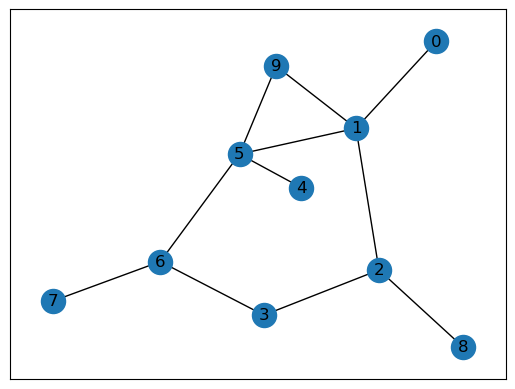

In [137]:
import networkx as nx

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [6]:
num_points = -1

# how many points in graph?
for p in points_list:
    if(p[0] > num_points):
        num_points = p[0]
    if(p[1] > num_points):
        num_points = p[1]
        
num_points = num_points + 1
    
MATRIX_SIZE = num_points

print ("Matrix size is ", MATRIX_SIZE, "by ", MATRIX_SIZE)

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    #print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R


Matrix size is  10 by  10


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,   0.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,   0.],
        [ -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1., 100.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0., 100.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.]])

In [7]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

# learning parameter
gamma = 0.5

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    #print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state, action, gamma)

0

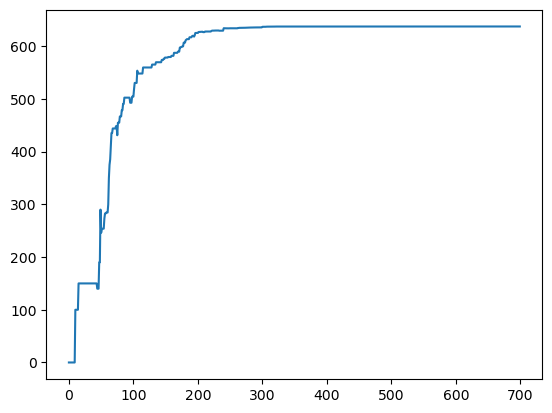

In [8]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    #print (current_state, available_act)
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Score:', str(score))

plt.plot(scores)
plt.show()

In [141]:
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.          12.5          0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  6.25         0.          12.5          0.           0.
   25.           0.           0.           0.          12.5       ]
 [  0.          12.5          0.          25.           0.
    0.           0.           0.           6.25         0.        ]
 [  0.           0.          12.5          0.           0.
    0.          50.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   25.           0.           0.           0.           0.        ]
 [  0.          12.5          0.           0.          12.5
    0.          50.           0.           0.          12.5       ]
 [  0.           0.           0.          25.           0.
   24.99999999   0.         100.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          50.         100. 

In [9]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)


Most efficient path:
[0, 1, 5, 6, 7]
